In [1]:
pip install control

In [2]:
import control

In [3]:
s = control.tf('s')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sistema de Resposta Inversa

In [5]:
K1 = 5.0
T1 = 5.0

In [6]:
P1 = K1/(T1*s+1)

In [7]:
K2 = 2.0
T2 = 1.0

In [8]:
P2 = K2/(T2*s+1)

In [9]:
Process = control.parallel(P1, -P2)

In [10]:
t, y = control.step_response(Process)

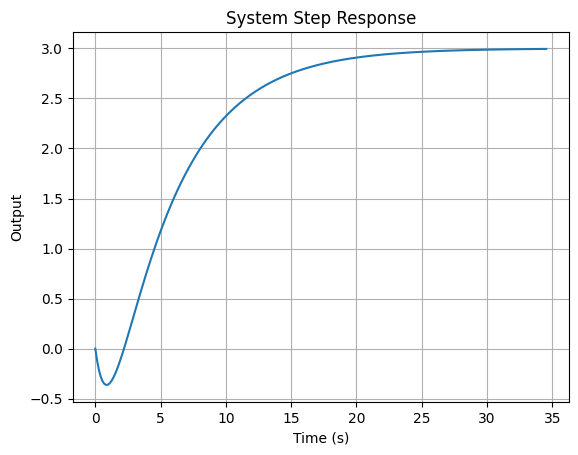

In [11]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

## Export Data

In [12]:
import pandas as pd
import numpy as np

In [13]:
t = np.transpose(t)
y = np.transpose(y)

In [14]:
df = pd.DataFrame({'t':t, 'y':y})

In [15]:
df.to_excel("RespostaInversa.xlsx", index=False)

# Ajuste de Parâmetros

In [16]:
df = pd.read_excel('RespostaInversa.xlsx')

In [17]:
df.describe()

,t,y
count,252.000000,252.000000
mean,17.269388,2.331528
std,10.030051,0.976696
min,0.000000,-0.363016
25%,8.634694,2.111153
50%,17.269388,2.841871
75%,25.904082,2.971881
max,34.538776,2.995000


In [18]:
Max_t = df['t'].max()

In [19]:
Delta_t = df._get_value(1, 't') - df._get_value(0, 't')

In [20]:
Count_t = len(df['t'])

## Optimize

In [21]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [22]:
def fun(x):
    global df

    K1 = x[0]
    T1 = x[1]

    K2 = x[2]
    T2 = x[3]

    P1 = K1/(T1*s+1)
    P2 = K2/(T2*s+1)
    sys = control.parallel(P1, -P2)

    # Simulate step response
    t_fun, y_fun = control.step_response(sys, T=Max_t, T_num=Count_t)
    df_fun = pd.DataFrame({'t_fun':t_fun, 'y_fun':y_fun})

    mse = mean_squared_error(df_fun['y_fun'], df['y'])
    return mse

In [23]:
x0 = [1, 1, 1, 1]

In [24]:
bnds = ((0, None), (0, None), (0, None), (0, None))

In [25]:
res = minimize(fun, x0, method='Powell', bounds=bnds, tol=1e-15)

In [26]:
K1_opt = res.x[0]
T1_opt = res.x[1]
K2_opt = res.x[2]
T2_opt = res.x[3]

P1_opt = K1_opt/(T1_opt*s+1)
P2_opt = K2_opt/(T2_opt*s+1)
sys_opt = control.parallel(P1_opt, -P2_opt)

In [27]:
print('K1=', K1_opt)
print('T1=', T1_opt)
print('K2=', K2_opt)
print('T2=', T2_opt)

K1= 5.000000000039862
T1= 4.999999999971464
K2= 2.0000000000393703
T2= 1.0000000000134333


## Plots

In [28]:
t_opt, y_opt = control.step_response(sys_opt, T=Max_t, T_num=Count_t)

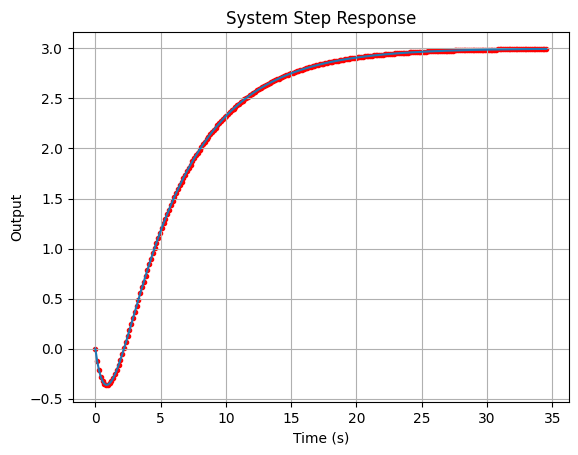

In [29]:
# Plot step response
plt.plot(t_opt,y_opt)
plt.scatter(df['t'], df['y'], marker= ".", color = "red")
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()